In [1]:
import pandas as pd
df=pd.read_csv('credit_risk2.csv',sep=';',encoding='cp1251')

Этот фрагмент кода выполняет чтение CSV-файла с помощью библиотеки pandas. encoding='cp1251'задаёт кодировку файла. cp1251 — это кодовая страница Windows для кириллических символов.

In [13]:
df.head(20)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22.0,59000,RENT,123.0,PERSONAL,35000,16.фев,1,0.59,Y,3
1,1,21.0,9600,OWN,5.0,EDUCATION,1000,ноя.14,0,0.10,N,2
2,2,25.0,9600,MORTGAGE,1.0,MEDICAL,5500,дек.87,1,0.57,N,3
3,3,23.0,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24.0,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
5,5,21.0,9900,OWN,2.0,VENTURE,2500,июл.14,1,0.25,N,2
6,6,26.0,77100,RENET,8.0,EDUCATION,35000,дек.42,1,0.45,N,3
7,7,24.0,78956,RENT,5.0,MEDICAL,35000,11.ноя,1,0.44,N,4
8,8,24.0,83000,RENT,8.0,PERSONAL,35000,08.сен,1,0.42,N,2
9,9,21.0,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3


Возвращает первые 20 строк таблицы с помощью метода head

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              652 non-null    int64  
 1   Age             652 non-null    float64
 2   Income          652 non-null    int64  
 3   Home            652 non-null    object 
 4   Emp_length      643 non-null    float64
 5   Intent          652 non-null    object 
 6   Amount          652 non-null    int64  
 7   Rate            586 non-null    object 
 8   Status          652 non-null    int64  
 9   Percent_income  652 non-null    float64
 10  Default         652 non-null    object 
 11  Cred_length     652 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 61.3+ KB


С помощью команды info() оцениваются столбцы датасета. Проанализировав данные,можно сделать следующие выводы: всего 12 столбцов и 652 объекта, но при этом существуют строки, где данные заполнены не полностью. Age, Emp_length должны иметь тип int64, Rate - float64.

In [15]:
print(df.isna().sum())

Id                 0
Age                0
Income             0
Home               0
Emp_length         9
Intent             0
Amount             0
Rate              66
Status             0
Percent_income     0
Default            0
Cred_length        0
dtype: int64


Для нахождения пропусков применяется метод isna(), а чтобы посчитать их количество, воспользуемся sum(). В результате получаем, что пропуски имеются в таких столбцах как Rate и Emp_length

In [16]:
df = df.dropna(subset=['Rate', 'Emp_length'])

С помощью метода dropna удаляем пропуски в столбце Rate и Emp_length

In [17]:
print(df.isna().sum())

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64


Снова проверяем на наличие пропусков. Больше пропусков не имеется

In [18]:
df=df.astype({'Age':'int64','Emp_length':'int64'})

С помощью метода astype меняется тип данных

In [19]:
import pandas as pd

df['Rate'] = df['Rate'].astype(str).str.replace(',', '.', regex=False)
df['Rate'] = df['Rate'].str.replace(r'[^\d.]', '', regex=True)
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')
df.loc[df['Rate'] >= 20, 'Rate'] = df['Rate'] / 10

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 0 to 651
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              578 non-null    int64  
 1   Age             578 non-null    int64  
 2   Income          578 non-null    int64  
 3   Home            578 non-null    object 
 4   Emp_length      578 non-null    int64  
 5   Intent          578 non-null    object 
 6   Amount          578 non-null    int64  
 7   Rate            578 non-null    float64
 8   Status          578 non-null    int64  
 9   Percent_income  578 non-null    float64
 10  Default         578 non-null    object 
 11  Cred_length     578 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 74.9+ KB


,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,324.901384,24.370242,91553.373702,4.676471,19154.455017,7.025401,0.596886,0.280986,3.024221
std,188.844243,8.306600,69399.766695,7.609000,8943.489339,7.128570,0.490948,0.150869,0.809027
min,0.000000,21.000000,9600.000000,0.000000,1000.000000,0.140000,0.000000,0.010000,2.000000
25%,162.250000,23.000000,47000.000000,2.000000,12000.000000,0.620000,0.000000,0.160000,2.000000
50%,324.500000,24.000000,70000.000000,4.000000,22000.000000,0.990000,1.000000,0.280000,3.000000
75%,490.750000,25.000000,130000.000000,7.000000,25000.000000,14.605000,1.000000,0.380000,4.000000
max,649.000000,144.000000,500000.000000,123.000000,35000.000000,19.910000,1.000000,0.830000,4.000000


Запятые заменяются на точки, убираются все символы кроме цифр и точек. Значения в столбце 'Rate' приводятся к единообразному числовому формату и если значение больше или равно 20, происходит деление на 10

In [20]:
df = df[df['Age'] <= 100]
df = df[df['Emp_length'] < df['Age']]
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,325.905759,23.790576,90989.260035,4.270506,19171.160558,7.032220,0.600349,0.281710,3.024433
std,188.458714,1.479977,69093.658611,3.044849,8920.719704,7.129147,0.490255,0.150016,0.810398
min,1.000000,21.000000,9600.000000,0.000000,1000.000000,0.140000,0.000000,0.010000,2.000000
25%,163.000000,23.000000,47000.000000,2.000000,12000.000000,0.620000,0.000000,0.160000,2.000000
50%,326.000000,24.000000,70000.000000,4.000000,22000.000000,0.990000,1.000000,0.280000,3.000000
75%,491.000000,25.000000,130000.000000,7.000000,25000.000000,14.610000,1.000000,0.380000,4.000000
max,649.000000,26.000000,500000.000000,11.000000,35000.000000,19.910000,1.000000,0.830000,4.000000


Удаляем строки, где Age > 100

In [21]:
df = df[df['Age'] >= 18]
df = df[(df['Emp_length'] >= 0) & (df['Cred_length'] >= 0)]
max_possible_experience = df['Age'] - 18
df = df[
    (df['Emp_length'] <= max_possible_experience) &
    (df['Cred_length'] <= max_possible_experience)
]
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,333.978082,23.967123,87349.402740,2.550685,19168.835616,7.208000,0.605479,0.289096,3.049315
std,185.441334,1.421582,65190.140748,2.002960,8978.657903,7.192547,0.489418,0.151369,0.800262
min,2.000000,21.000000,9600.000000,0.000000,1200.000000,0.140000,0.000000,0.010000,2.000000
25%,175.000000,23.000000,45000.000000,1.000000,13000.000000,0.620000,0.000000,0.160000,2.000000
50%,335.000000,24.000000,67000.000000,2.000000,22000.000000,0.990000,1.000000,0.290000,3.000000
75%,495.000000,25.000000,120000.000000,4.000000,25000.000000,14.650000,1.000000,0.390000,4.000000
max,648.000000,26.000000,306000.000000,8.000000,35000.000000,19.910000,1.000000,0.830000,4.000000


Оставляем только возраст >= 18, убеждаемся, что стаж и кредитная история неотрицательны, так как кредит можно брать только совершеннолетним

In [22]:
columns_to_check=['Id',	'Age',	'Income',	'Home',	'Emp_length','Intent',	'Amount',	'Rate',	'Status',	'Percent_income',	'Default',	'Cred_length']
for x in columns_to_check:
  print(x,":","\n", df[x].unique(),"\n")

Id : 
 [  2   3   5   6   7  11  12  13  14  16  20  22  23  24  26  27  28  31
  32  33  36  38  40  41  43  45  47  48  49  55  56  69  73  74  75  79
  80  82  89  91  92  95  96  97  98 101 102 103 106 107 109 110 111 112
 113 115 116 118 119 121 123 124 126 128 129 130 131 132 133 134 135 136
 137 138 142 143 145 146 147 151 154 155 157 159 160 161 162 163 168 169
 173 175 176 177 178 180 184 185 191 192 193 195 197 199 200 201 204 205
 207 211 214 215 216 217 219 223 228 230 231 232 235 236 237 242 243 245
 246 249 250 252 254 258 260 262 263 266 267 269 270 271 273 274 275 276
 277 278 279 280 284 285 287 288 289 290 291 292 294 295 297 299 300 301
 303 304 305 309 310 311 312 313 317 318 320 322 324 326 327 328 330 331
 332 334 335 336 337 338 340 341 342 344 345 346 348 349 352 354 355 356
 357 358 363 364 365 367 368 372 374 375 376 377 378 381 384 385 386 389
 390 391 394 395 398 399 400 401 403 404 406 409 411 412 413 414 417 420
 422 424 427 431 432 434 435 436 438 439 444

Проверка на неявные дубликаты. Неявные дубликаты были выявлены в столбцах Default и Home.

In [23]:
df["Default"]=df["Default"].replace("No","N")
df["Home"]=df["Home"].replace('RENET', 'RENT')
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,333.978082,23.967123,87349.402740,2.550685,19168.835616,7.208000,0.605479,0.289096,3.049315
std,185.441334,1.421582,65190.140748,2.002960,8978.657903,7.192547,0.489418,0.151369,0.800262
min,2.000000,21.000000,9600.000000,0.000000,1200.000000,0.140000,0.000000,0.010000,2.000000
25%,175.000000,23.000000,45000.000000,1.000000,13000.000000,0.620000,0.000000,0.160000,2.000000
50%,335.000000,24.000000,67000.000000,2.000000,22000.000000,0.990000,1.000000,0.290000,3.000000
75%,495.000000,25.000000,120000.000000,4.000000,25000.000000,14.650000,1.000000,0.390000,4.000000
max,648.000000,26.000000,306000.000000,8.000000,35000.000000,19.910000,1.000000,0.830000,4.000000


Замена неявных дубликатов с помощью метода replace. С помощью метода describe() можно оценить числовые столбцы таблицы. Таким образом,максимальный возраст 26 лет, а минимальный 21, минимальная ставка по кредиту 2%, а максимальная 19.91%. Также есть люди, чей стаж работы составляет 0 лет.

In [24]:
#задание 2
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

numeric_cols = ['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Percent_income', 'Cred_length']
df_numeric = df[numeric_cols].dropna()

# Строим pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(df_numeric, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Матрица диаграмм рассеяния (все числовые признаки)', y=1.02)
plt.show()

ModuleNotFoundError: No module named 'seaborn'

plt.figure() — функция из библиотеки matplotlib.pyplot, которая инициализирует новую фигуру (графическое окно). figsize=(12, 10) — задаёт размер фигуры в дюймах: ширина = 12 дюймов, высота = 10 дюймов. Происходит построение матрицы диаграмм рассеяния (pairplot) на основе данных из df_numeric. diag_kind='kde' — определяет, что рисовать по диагонали матрицы. 'kde' — оценка плотности ядра - сглаженная кривая распределения. plot_kws={'alpha': 0.6} — передаёт параметры для scatter-графиков: 'alpha': 0.6 — задаёт прозрачность точек (0 = полностью прозрачно, 1 = непрозрачно).
Диаграмма чётко показывает:сильные линейные зависимости между возрастом, стажем и кредитной историей. Умеренную связь между доходом и суммой кредита. Отсутствие связи между ставкой и демографическими признаками.

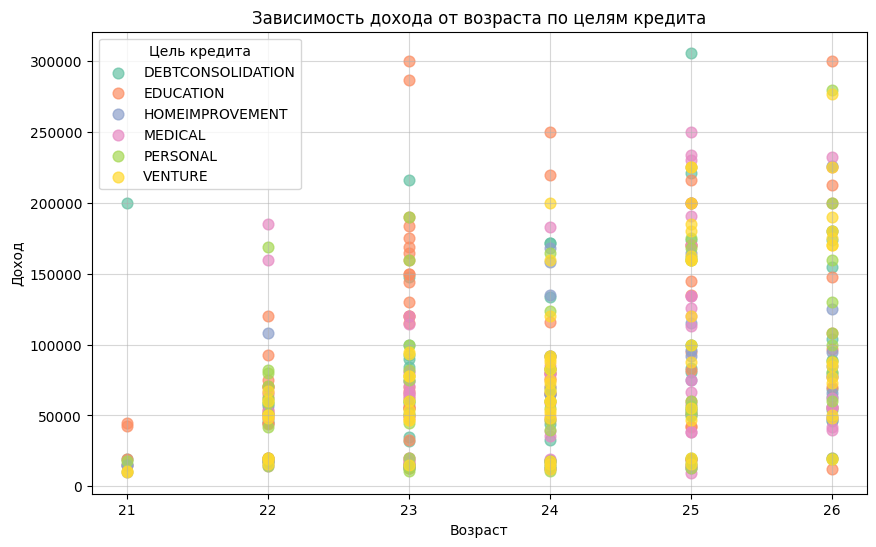

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Группируем и строим каждый scatter отдельно через pandas
ax = None
colors = plt.cm.Set2.colors

for i, (intent, group) in enumerate(df.groupby('Intent')):
    ax = group.plot.scatter(
        x='Age',
        y='Income',
        label=intent,
        color=colors[i % len(colors)],
        alpha=0.7,
        s=60,
        ax=ax,
        figsize=(10, 6)
    )

# Настройки графика
plt.title('Зависимость дохода от возраста по целям кредита')
plt.xlabel('Возраст')
plt.ylabel('Доход')
plt.legend(title='Цель кредита')
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()

Точечная диаграмма по категориям с использованием библиотеки seaborn. В данной диаграмме столбец 'Age' (возраст), столбец 'Income' (доход). Каждая цель (EDUCATION, MEDICAL, PERSONAL и т.д.) получит свой цвет. palette='Set2' — выбрать палитру цветов. alpha=0.7 — задать прозрачность точек (0 = полностью прозрачно, 1 = непрозрачно). Из диаграммы видно, что нет жёсткой связи между возрастом и доходом.

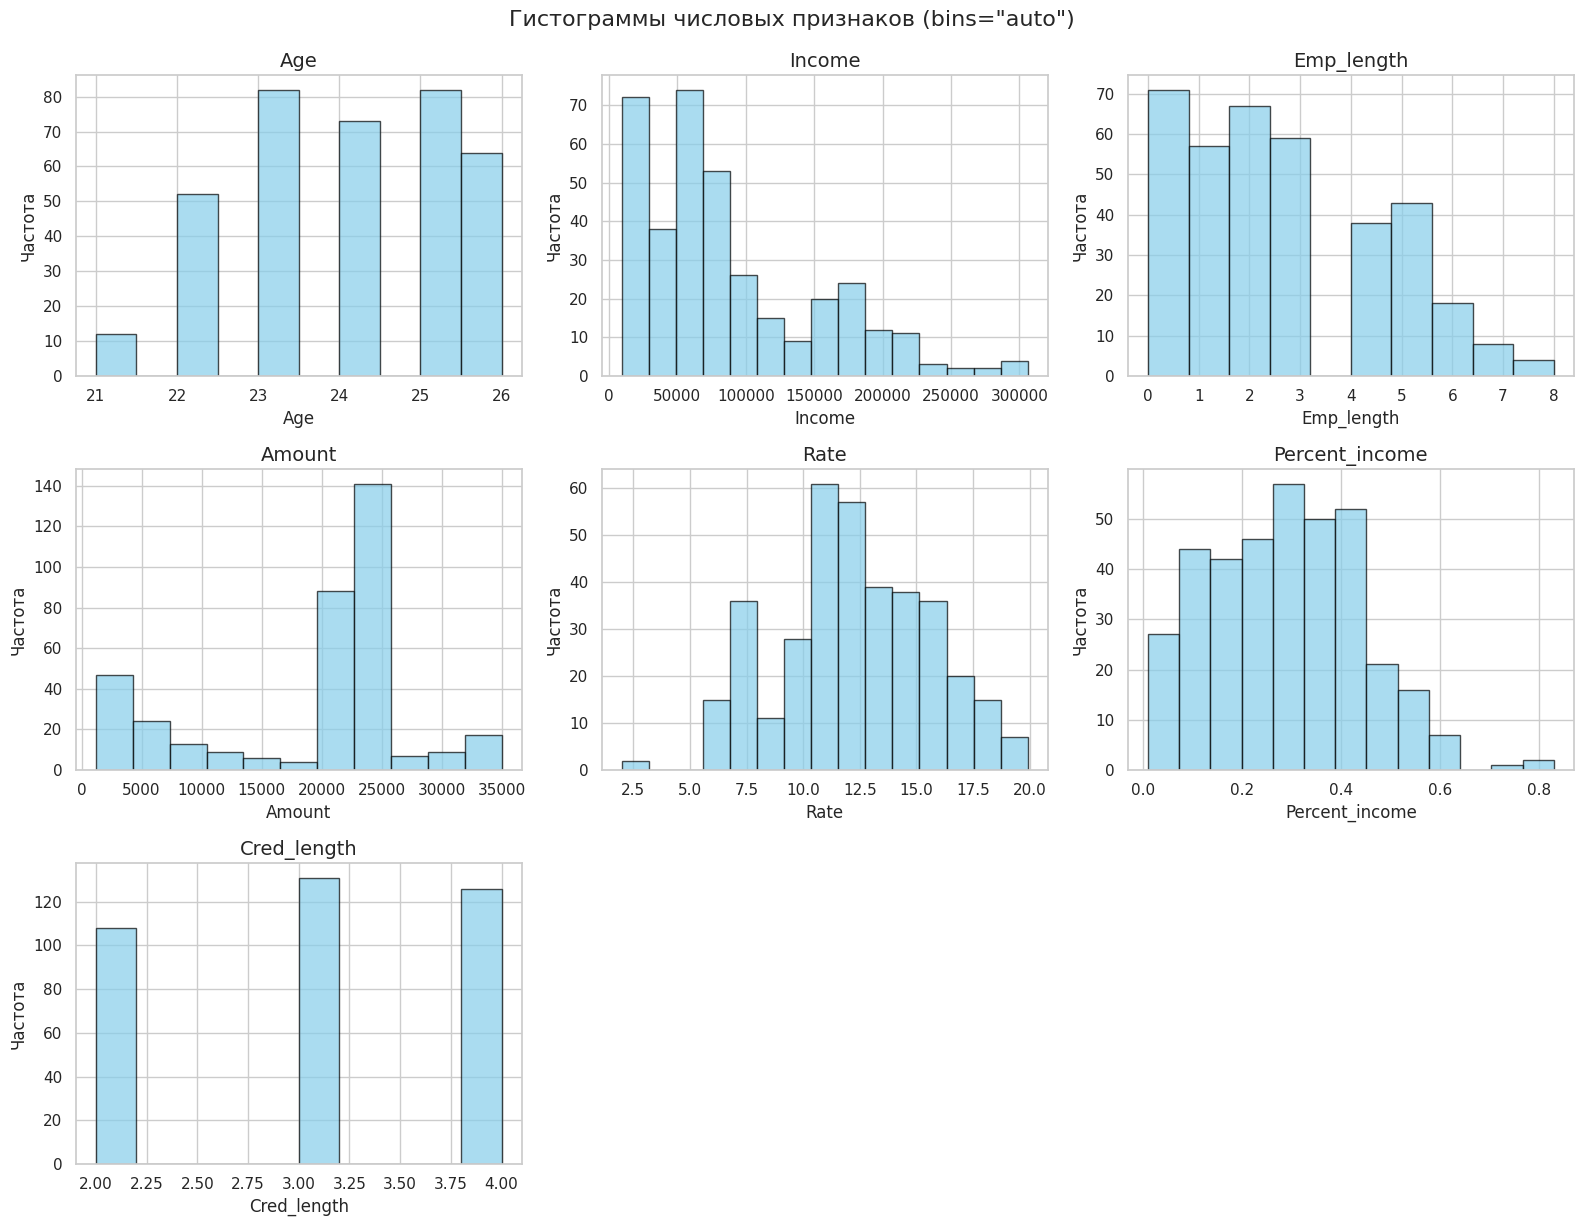

In [ ]:
numeric_cols = ['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Percent_income', 'Cred_length']
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    df[col].hist(bins='auto', ax=ax, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'{col}', fontsize=14)
    ax.set_xlabel(col)
    ax.set_ylabel('Частота')

for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Гистограммы числовых признаков (bins="auto")', y=1.02, fontsize=16)
plt.show()

Из графиков видно, что большинство заёмщиков — с доходом 25–75 тыс.Есть немного людей с доходом до 300 тыс, распределение смещено вправо.Много кредитов на 10–35 тыс. Пик около 35 тыс. Также смещено вправо. Пик в 30–40 лет — основная аудитория банка. Мало молодых (<25), а пожилых (>60) вообще нет. Также видно, что много людей со стажем 0–5 лет. Большинство клиентов имеют небольшую историю(2-3 года). У процентной ставки пик в 12–15% — стандартная ставка. Минимум ~5%, максимум ~20%. Большинство — 0.3–0.6 - банк выдаёт кредиты, где плата ≤ 60% дохода. Есть немного с >0.8 — высокорисковые, но они есть.

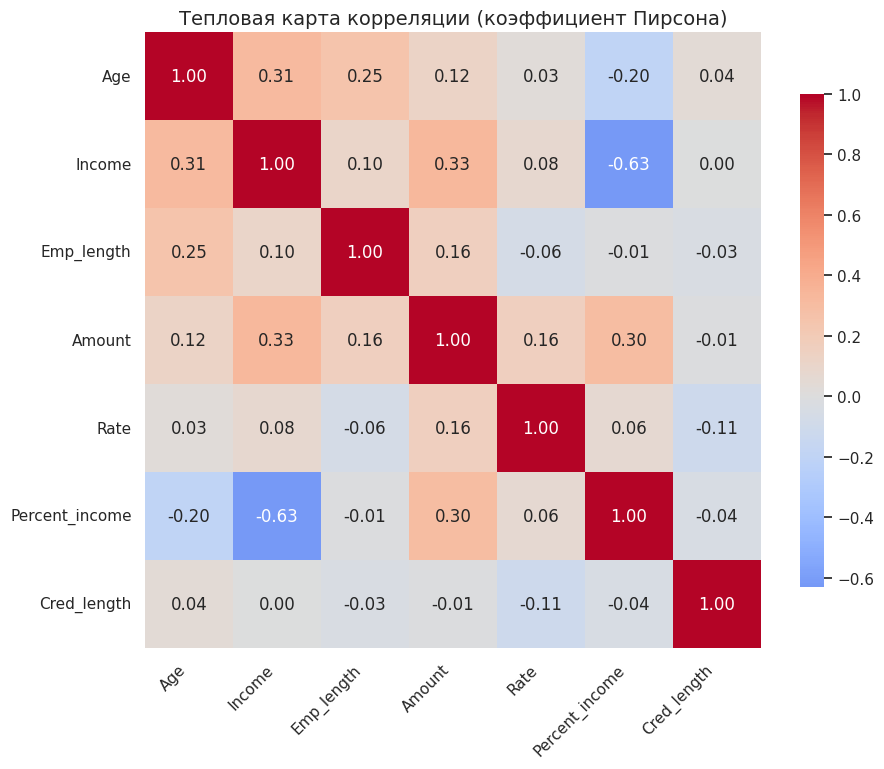

In [ ]:
numeric_cols = ['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Percent_income', 'Cred_length']
df_num = df[numeric_cols].dropna()
# Ковариационная матрица
cov_matrix = df_num.cov()

# Корреляционная матрица (Пирсона)
corr_matrix = df_num.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    cbar_kws={'shrink': 0.8}
)
plt.title('Тепловая карта корреляции (коэффициент Пирсона)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

Анализ корреляционной матрицы показал наличие сильных положительных линейных связей между возрастом, стажем работы и длиной кредитной истории, что соответствует логике накопления опыта и истории со временем. Также наблюдается умеренная связь между доходом и суммой кредита. В то же время процентная ставка не демонстрирует линейной зависимости ни с одним из демографических или финансовых признаков, что свидетельствует о её назначении на основе комплексной оценки риска, а не простых характеристик заёмщика.

Задание 1 : Использовать seaborn. По группировке - цель кредита (intent) по
количеству статуса домовладения (home) построить диаграмму следующего
вида:


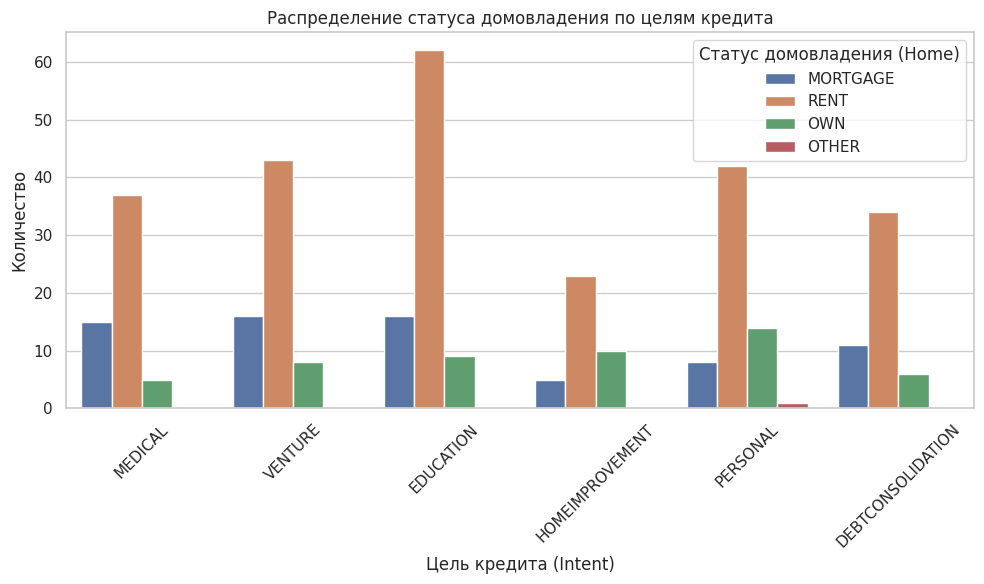

In [ ]:
#индивидуальное задание 1
import seaborn as sns
import matplotlib.pyplot as plt

# Построение grouped bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Intent', hue='Home')
plt.title('Распределение статуса домовладения по целям кредита')
plt.xlabel('Цель кредита (Intent)')
plt.ylabel('Количество')
plt.legend(title='Статус домовладения (Home)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Доминирующий статус — RENT (аренда). Во всех категориях, кроме HOMEIMPROVEMENT, арендаторы составляют большинство. Особенно сильно — в EDUCATION и VENTURE. Собственники (OWN) — редки. Только в PERSONAL и HOMEIMPROVEMENT их доля заметна (~10–14). В остальных — менее 10. Ипотечники (MORTGAGE) — вторая по численности группа. Их доля — от 5 до 16. Наиболее активны в EDUCATION и VENTURE.  OTHER — почти не встречается. Только в PERSONAL есть 1 случай.

Задание 2: Использовать pandas и plot. Отфильтровать возраст - до 100. По
сводной таблице (pivot_table) - отобразить средний доход (income) по возрасту.
Оставить только маркеры в виде ★ коричневого цвета размером 16.

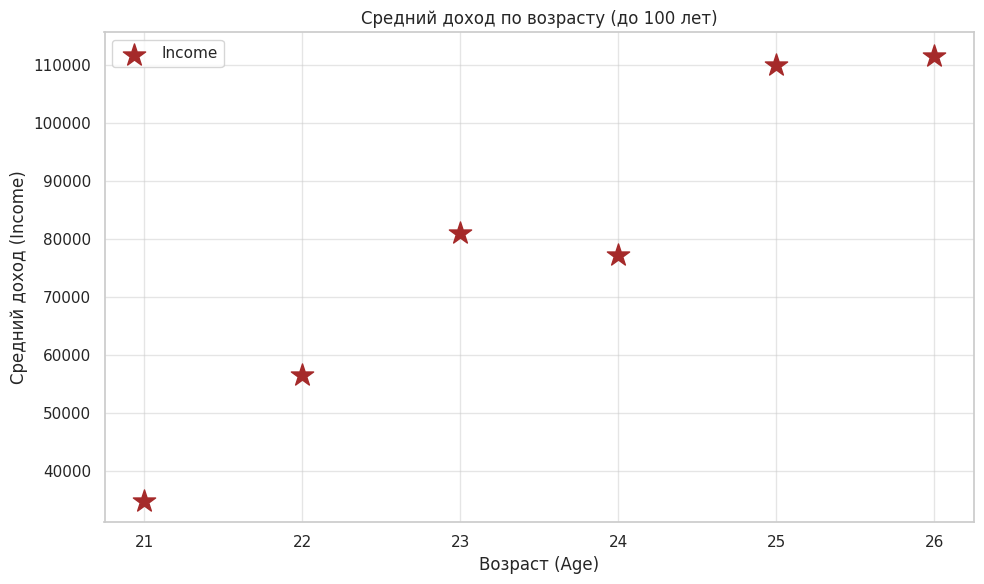

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Предобработка данных
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
df = df[(df['Age'] <= 100) & (df['Age'].notna()) & (df['Income'].notna())]

# Создание сводной таблицы
pivot = df.pivot_table(index='Age', values='Income', aggfunc='mean')

# Подготовка данных
pivot_reset = pivot.reset_index()

# Построение графика
pivot_reset.plot(
    kind='scatter',
    x='Age',
    y='Income',
    figsize=(10, 6),
    marker='$★$',
    color='brown',
    s=256,
    label="Income",
    legend=True
    )
plt.title('Средний доход по возрасту (до 100 лет)')
plt.xlabel('Возраст (Age)')
plt.ylabel('Средний доход (Income)')
plt.grid(True, linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

Проанализировав диаграмму, видно, что люди в возрасте 21 имеют доход ≈ 35 000, а 22 их доход составляет ≈ 57 000, в 23 доход составляет ≈ 81 000, у людей, которым 24 года наблюдается спад дохода ≈ 78 000, что касается 25 и 26 лет, тот у них доход больше 100 000

Задание 3: Использовать matplotlib. Построить круговую диаграмму, которая
отображает процент по каждой цели кредита (intent).

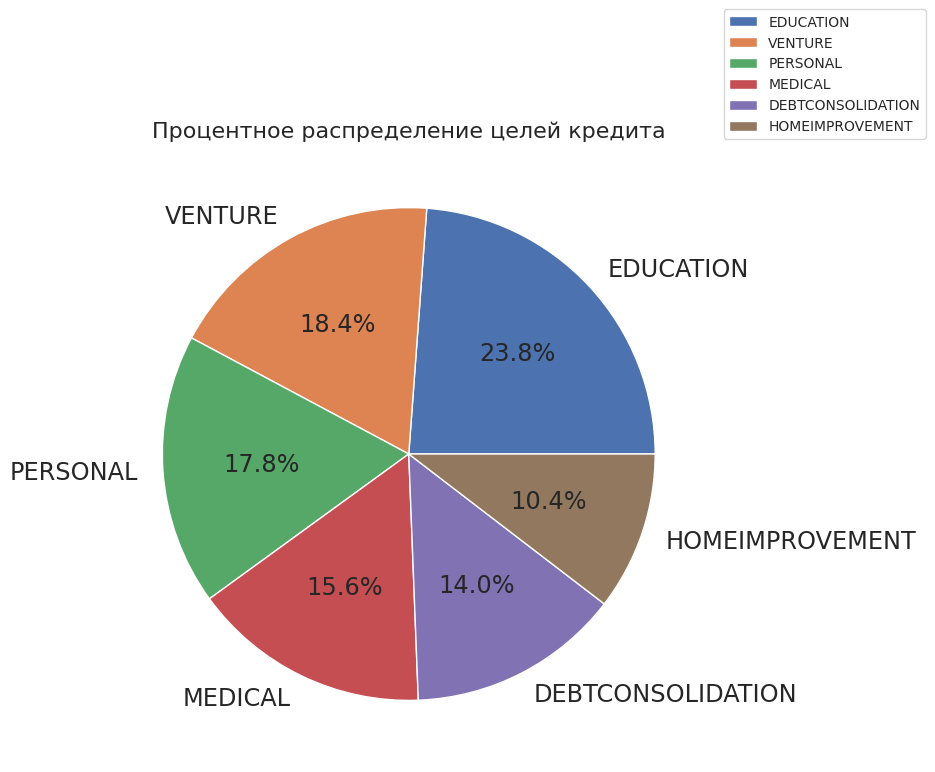

In [ ]:
#Задание 3
import pandas as pd
import matplotlib.pyplot as plt

intent_counts = df['Intent'].value_counts()
plt.figure(figsize=(26, 8))
plt.pie(intent_counts, labels=intent_counts.index, autopct='%1.1f%%', textprops={'size': 'x-large'})
plt.legend(fontsize=10, bbox_to_anchor=(1, 1))
plt.title('Процентное распределение целей кредита', fontsize=16)
plt.show()

EDUCATION (Образование) — 23.8%. Лидер по доле — почти четверть всех кредитов. Это говорит о том, что образование — самая популярная цель кредита. VENTURE (Бизнес/стартап) — 18.4%. Второе место — значительная доля. PERSONAL (Личные нужды) — 17.8%. Почти столько же, сколько и VENTURE. MEDICAL (Медицинские нужды) — 15.6%. Четвёртое место — значительная доля. DEBTCONSOLIDATION (Объединение долгов) — 14.0%. Пятая по величине категория. HOMEIMPROVEMENT (Улучшение жилья) — 10.4%. Самая маленькая доля из шести. Нет доминирующей категории — все цели имеют схожую долю

Выполните минимум один любой график типа hexagonal binning plot. Сделайте
выводы.

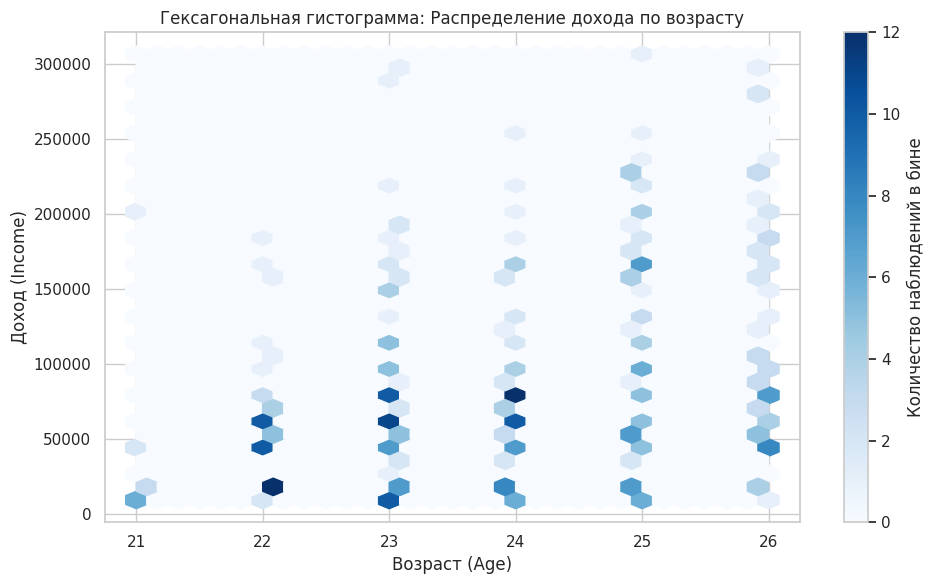

In [ ]:
# График типа hexagonal binning plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
hb = plt.hexbin(df['Age'], df['Income'], gridsize=30, cmap='Blues')
plt.colorbar(hb, label='Количество наблюдений в бине')
plt.xlabel('Возраст (Age)')
plt.ylabel('Доход (Income)')
plt.title('Гексагональная гистограмма: Распределение дохода по возрасту')
plt.tight_layout()
plt.show()

Гексагональная гистограмма (hexbin plot) — разновидность scatter plot, где: точки группируются в шестиугольники (бины), цвет шестиугольника показывает количество наблюдений в этом бине (чем темнее — тем больше людей),тпо оси X — Возраст (Age): от 21 до 26 лет, по оси Y — Доход (Income): от 0 до 300 000. На графике видно, что большинство точек сконцентрированы в нижней части — доходы от 0 до 150 000. Есть отдельные точки выше 200 000 — но их мало. С возрастом (от 21 до 26) — область плотности сдвигается вверх,т.е. люди становятся богаче.

Выполните минимум один график типа boxplot для любого столбца. Сделайте выводы.

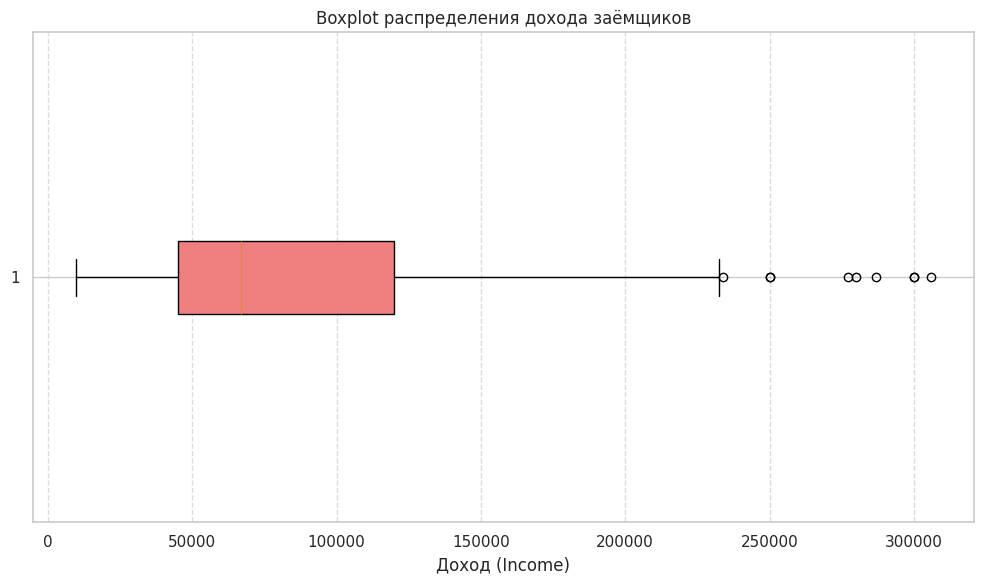

In [ ]:
# график типа boxplot
import pandas as pd
import matplotlib.pyplot as plt

df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
income_data = df['Income'].dropna()
plt.figure(figsize=(10, 6))
plt.boxplot(income_data, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightcoral'))
plt.xlabel('Доход (Income)')
plt.title('Boxplot распределения дохода заёмщиков')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Ящик (Box) обозначает межквартильный размах (IQR) — от 25-го до 75-го процентиля. Внутри ящика — медиана (горизонтальная линия). На нашем графике:
Ящик: от 40 000 до 120 000 значит, 50% всех заёмщиков имеют доход в этом диапазоне. Медиана: около 70 000, т.е. половина заёмщиков зарабатывает меньше 70 000, половина — больше.
Левый ус — минимальное значение (без выбросов),правый ус — максимальное значение (без выбросов). На нашем графике: левый ус: начинается от 10 000, т.е. минимальный доход без выбросов. Правый ус: заканчивается на 230 000, т.е максимальный доход без выбросов. Большинство заёмщиков — с доходом от 10 000 до 230 000.
Точки справа от правого уса — выбросы. На нашем графике: несколько точек от 250 000 до 300 000. Если медиана ближе к левому краю ящика — распределение смещено вправо. На нашем графике — медиана (70 000) ближе к левому краю ящика (40 000–120 000) значит, распределение смещено вправо. Большинство людей — с низким или средним доходом, а немногие — с очень высоким.


Добавьте категорию по любому числовому столбцу (например, уровень зарплаты -
высокий, низкий, средний). Сделайте boxplot по этому числовому столбцу по каждой
новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).

<Figure size 1000x600 with 0 Axes>

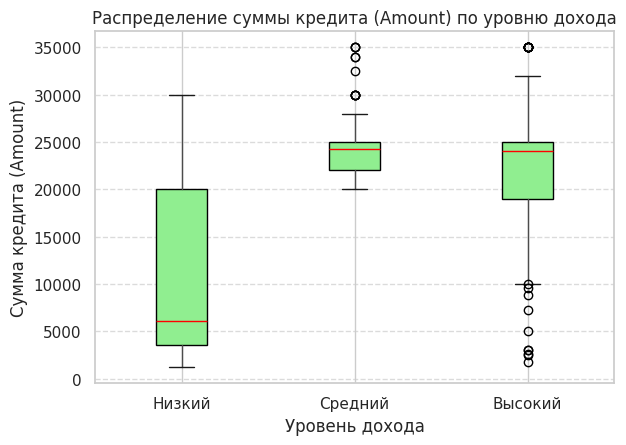

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df = df.dropna(subset=['Income', 'Amount'])
low_thresh = df['Income'].quantile(0.33)
high_thresh = df['Income'].quantile(0.66)
def categorize_income(income):
    if income <= low_thresh:
        return 'Низкий'
    elif income <= high_thresh:
        return 'Средний'
    else:
        return 'Высокий'

df['Income_Level'] = df['Income'].apply(categorize_income)
df['Income_Level'] = pd.Categorical(df['Income_Level'], categories=['Низкий', 'Средний', 'Высокий'])
plt.figure(figsize=(10, 6))
df.boxplot(column='Amount', by='Income_Level', patch_artist=True,
           boxprops=dict(facecolor='lightgreen'), medianprops=dict(color='red'))
plt.title('Распределение суммы кредита (Amount) по уровню дохода')
plt.suptitle('')
plt.xlabel('Уровень дохода')
plt.ylabel('Сумма кредита (Amount)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Представлен группированный boxplot, где: по оси X — Уровень дохода: Низкий, Средний, Высокий, а по оси Y — Сумма кредита (Amount): от 0 до 35 000, для каждого уровня дохода — свой boxplot, показывающий распределение сумм кредитов. По низкому уровню дохода можно сказать, что люди берут небольшие кредиты — в основном до 20 000, медиана 6 000. Люди со средним доходом берут более крупные кредиты — медиана 24 000, что почти в 4 раза больше, чем у низкого уровня.
Банк доверяет им больше — выдаёт кредиты до 30 000+. Люди с высоким доходом берут кредиты в том же диапазоне, что и средний уровень — но есть много выбросов (до 35 000). Этот график показывает, что сумма кредита растёт с уровнем дохода, но не линейно. Основная масса клиентов — со средним доходом, а высокодоходные — берут самые большие кредиты (выбросы)

Выполните ещё минимум 2 графика boxplot по другим категориям (например,
зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для каждой категории на ном графике). Используйте для построения графиков разные
библиотеки (минимум 2). Сделайте вывод.


/tmp/ipython-input-1985037753.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(home_groups, labels=df['Home'].unique(), patch_artist=True,


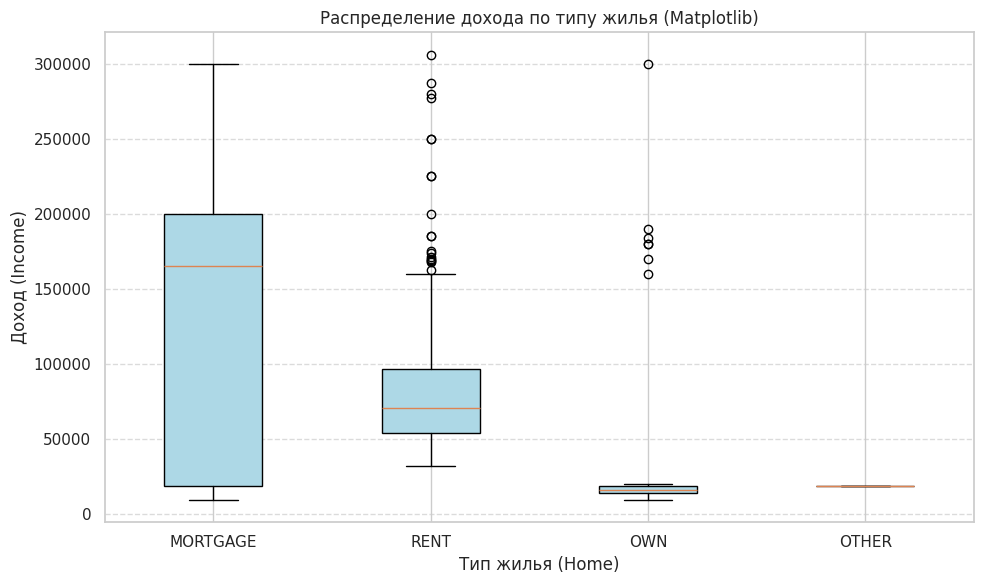

In [ ]:
# Группировка по Home
home_groups = [df[df['Home'] == cat]['Income'].dropna() for cat in df['Home'].unique()]

plt.figure(figsize=(10, 6))
plt.boxplot(home_groups, labels=df['Home'].unique(), patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.title('Распределение дохода по типу жилья (Matplotlib)')
plt.xlabel('Тип жилья (Home)')
plt.ylabel('Доход (Income)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Люди с ипотекой — имеют высокий доход, медиана 165 000 — почти в 3 раза выше, чем у арендаторов. Банк выдаёт ипотеку только тем, кто может себе это позволить — поэтому здесь много высокооплачиваемых. Арендаторы — основная масса заёмщиков, с доходом 40–90 000. Есть немного людей с высоким доходом. Люди, которые уже владеют жильём, — в основном имеют низкий доход. Высокодоходные люди с собственностью — редки (выбросы). Категория OTHER — очень маленькая и однородная. Люди с таким статусом — имеют низкий и стабильный доход (10–20 000).

/tmp/ipython-input-3391735337.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Intent', y='Income', palette='Set2')


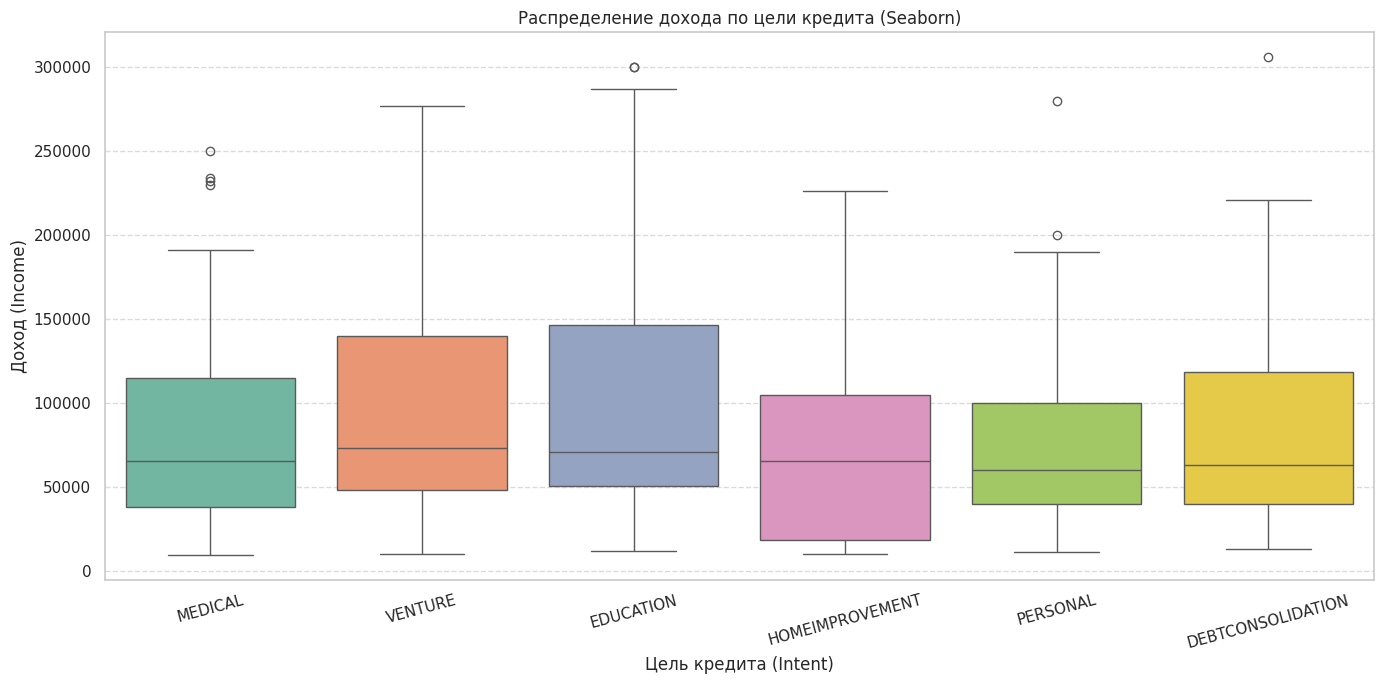

In [ ]:
# график Seaborn — Income по Intent
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Intent', y='Income', palette='Set2')
plt.title('Распределение дохода по цели кредита (Seaborn)')
plt.xlabel('Цель кредита (Intent)')
plt.ylabel('Доход (Income)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Люди, берущие кредиты на медицину, — в основном со средним доходом, но есть и высокооплачиваемые. Предприниматели — имеют более высокий доход, чем средний по выборке. Медиана 80 000 — выше, чем у MEDICAL и PERSONAL. Студенты и молодые специалисты — имеют разный уровень дохода, от низкого до очень высокого.
Медиана 70 000 — говорит о том, что многие уже работают, а не только учатся. Люди, ремонтирующие жильё, — в основном со средним или ниже среднего доходом.
Медиана 60 000 — ниже, чем у VENTURE и EDUCATION. Личные кредиты — универсальны, берут их люди со средним доходом. Медиана 65 000 — почти такая же, как у MEDICAL. Люди, объединяющие долги, — имеют средний доход, но часто находятся в финансовой нестабильности. Медиана 70 000 — выше, чем у HOMEIMPROVEMENT, но ниже, чем у VENTURE.

##### Вывод:
В ходе выполнения лабораторной работы была проведена предварительная обработка информации, а также были освоены навыки визуализации данных. В результате визуализации выяснилось,что возраст людей составял от 21 до 26 лет, что самой частой целью кредита является образование, большинство клиентов арендует жильё, с увеличением возраста клиентов увеличивается и их средний доход, большинство клиентов не допускали ранее дефолта по кредиту. Были построены матрица рассеивания, сглаженная и обычная гистограмма, круговая диаграмма, ящик с усами. Минимальный доход 9600, а максимальный 306000, минимальная процентная ставка была 0.14, а максимальная 19.91, что находится в пределах нормы. Минимальная сумма кредита 1200, а максимальная 3500. Было изучено понятие выбросов, ковариации и корреляции и их разница, а также построен тепловой график корреляции.